# Purpose
In this notebook I will implement a simple single-layer perceptron "by hand" and apply it to a couple datasets: one for binary classification and another for simple regression

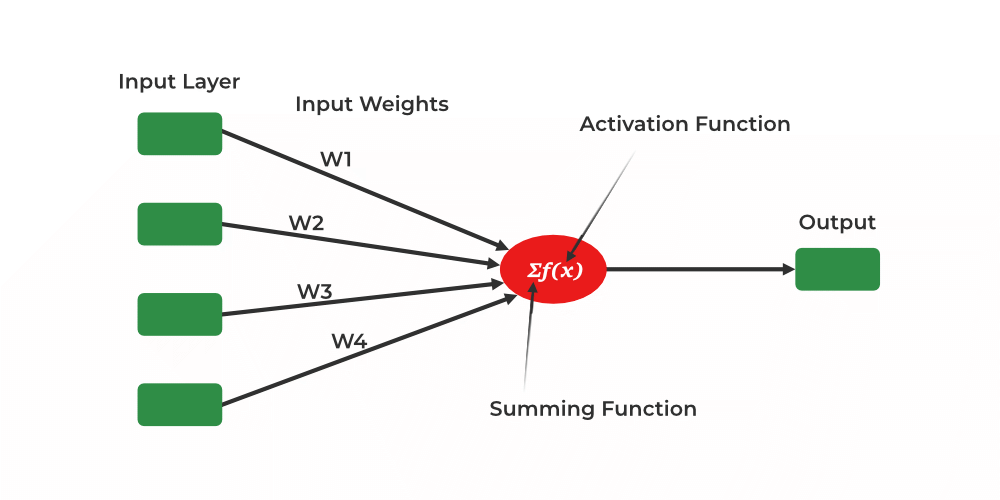

In [79]:
from PIL import Image

Image.open("resources/Single-Layer-Perceptron.png")

# Import packages

In [1]:
import sys

# append the path of the parent directory
sys.path.append("..")

# Data
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification, make_regression
from scipy import stats

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# My functions
import single_layer

# Make/load data

In [2]:
X_classification, y_classification = make_classification(
    n_samples=100, n_features=5, n_informative=3, n_classes=2, random_state=1
)

In [3]:
X_regression, y_regression = make_regression(
    n_samples=100, n_features=5, n_informative=3, noise=0.1, random_state=1
)

# Initial data exploration

## Classification

In [31]:
display(X_classification, y_classification)
X_classification_df = pd.DataFrame(X_classification)
X_classification_df.describe()

array([[ 2.77634918e+00, -4.74744631e-01, -1.13462882e+00,
         8.97012252e-01,  1.46713706e+00],
       [ 2.01318911e+00,  3.67554630e-01,  3.55571042e-01,
         1.13310429e+00,  2.25386712e+00],
       [ 2.32443598e+00, -9.17010548e-01, -6.95010397e-01,
         1.64950863e+00,  4.62138607e-01],
       [ 2.82992739e+00, -4.85533984e-01, -1.18285338e+00,
         8.86706299e-01,  1.49055825e+00],
       [ 2.34121929e+00, -3.97999189e-01, -6.24802320e-01,
         1.12610823e+00,  1.27124321e+00],
       [ 7.47175048e-01,  3.41331679e-02,  7.18426566e-01,
         1.19902439e+00,  7.34912716e-01],
       [-5.13641164e-02,  9.95797315e-01,  1.24901942e+00,
         1.97371644e-01,  1.58570711e+00],
       [-9.45368303e-01,  1.94317406e-01,  8.35335154e-01,
         1.59729509e-01, -4.08695544e-01],
       [ 1.17740467e+00,  1.13026214e-01, -1.65292563e+00,
        -1.30468982e+00,  9.92339722e-01],
       [ 2.17138927e+00, -5.78720776e-02,  3.12535456e-01,
         1.67813645e+00

array([1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1])

,0,1,2,3,4
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.464553,0.131923,-0.047328,0.060793,0.579804
std,2.153614,0.642352,1.255497,1.280000,1.072615
min,-4.886756,-1.329335,-2.703809,-2.585013,-2.162433
25%,-1.037188,-0.401084,-1.091035,-0.852048,-0.095783
50%,0.901828,0.233252,-0.231563,0.178551,0.649196
75%,2.116166,0.614723,0.829862,1.127124,1.377240
max,4.327951,1.615964,2.660517,2.391629,2.534527


In [37]:
X_classification_df_melt = X_classification_df.melt(
    var_name="Feature", value_name="Value"
)

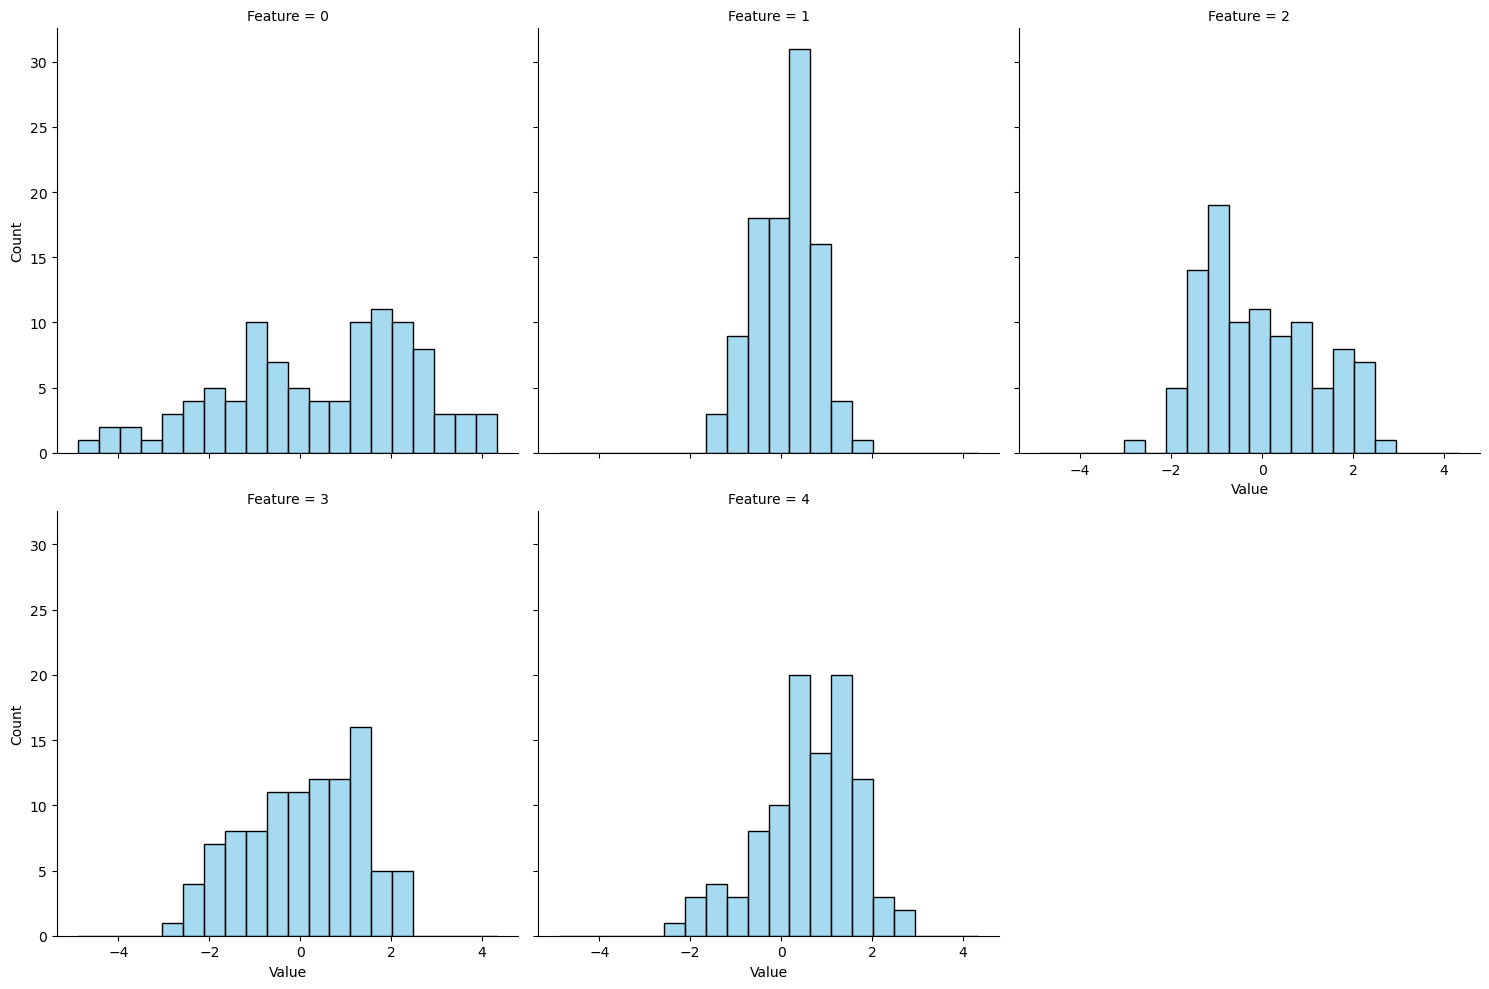

In [53]:
sns.displot(
    data=X_classification_df_melt,
    x="Value",
    col="Feature",
    col_wrap=3,
    kind="hist",
    rug=False,
    color="skyblue",
    bins=20,
)

In [57]:
X_classification_df_withy = X_classification_df.copy()
X_classification_df_withy["y"] = y_classification

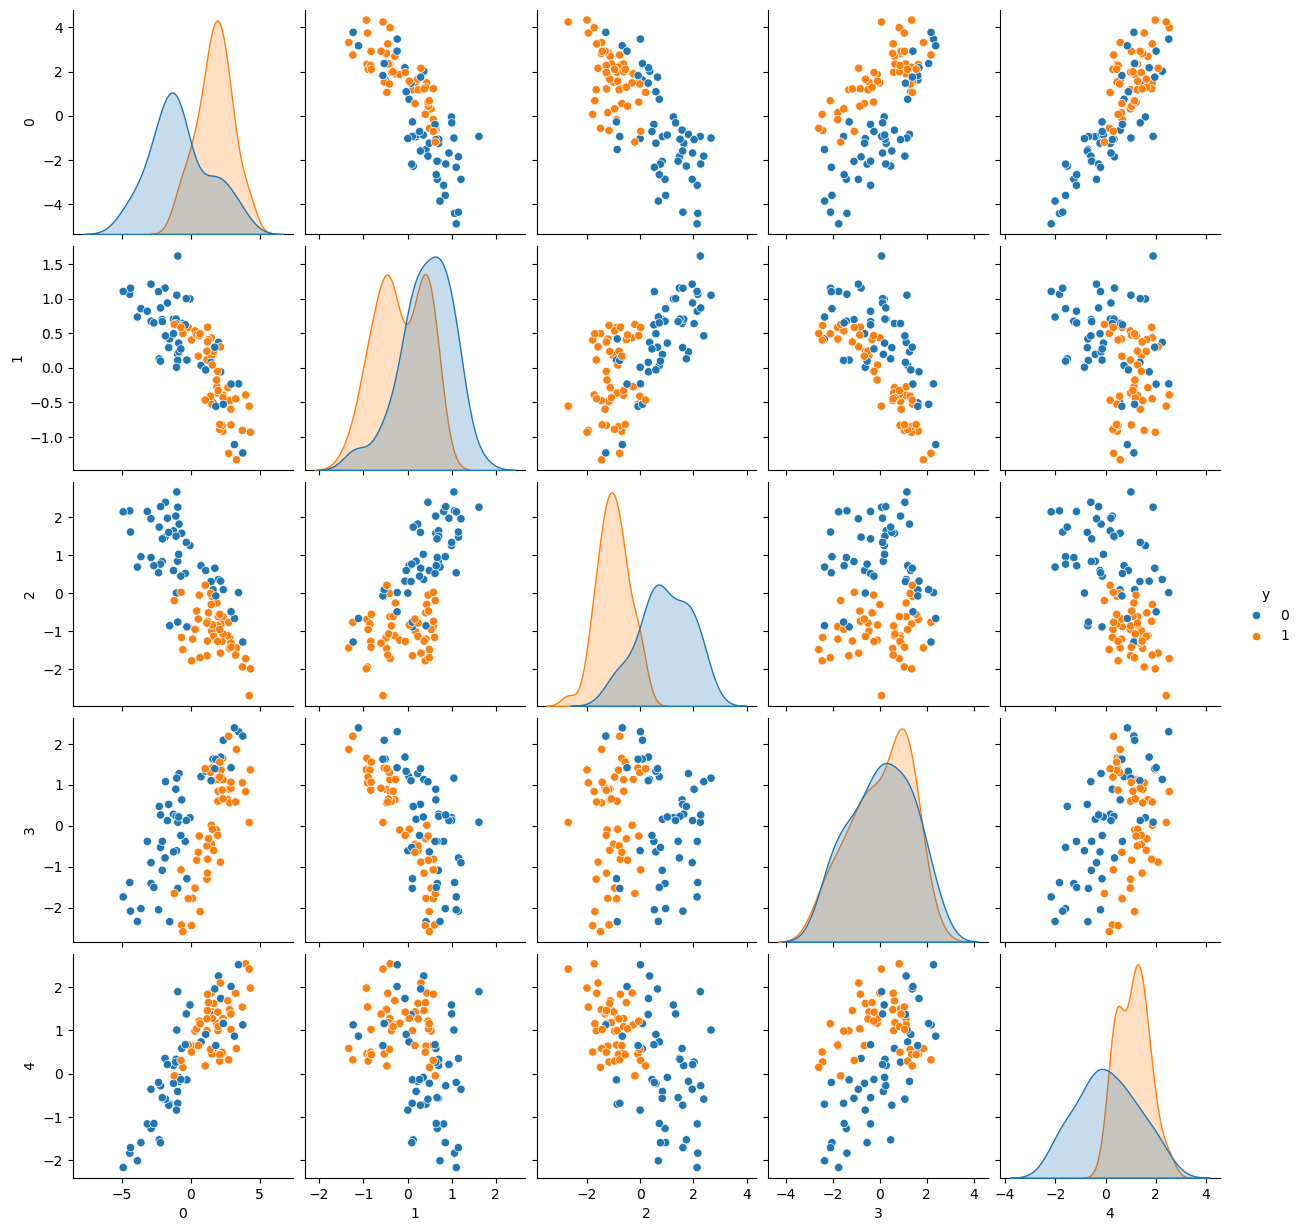

In [59]:
sns.pairplot(data=X_classification_df_withy, hue="y")

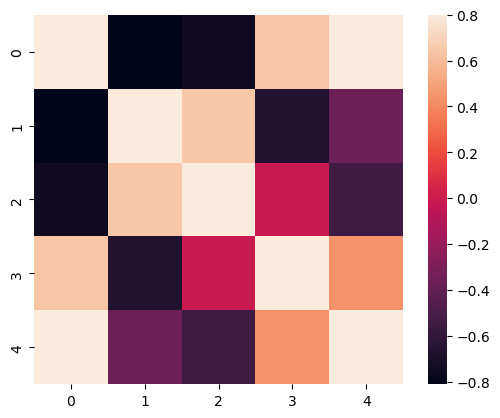

In [66]:
sns.heatmap(X_classification_df.corr(), vmax=0.8, square=True)

Notes:
- We indeed have 3 features with a clear separation between classes. Another (feature 1) is maybe also able to contribute for the classification
- Feature 0 has higher variance than the others, feature 1 is the opposite
- Many features correlate with each other positively or negatively (multicollinearity), and so both of them are not needed for classification as they give us the same information

## Regression

In [68]:
display(X_regression, y_regression)
X_regression_df = pd.DataFrame(X_regression)
X_regression_df.describe()

array([[ 1.25286816e+00,  5.12929820e-01,  4.88518147e-01,
        -2.98092835e-01, -7.54397941e-01],
       [ 5.02740882e-01,  1.55880554e+00, -1.21974440e+00,
         1.09402696e-01,  1.61694960e+00],
       [-1.95210529e+00, -1.40232915e+00, -6.94920901e-01,
         4.51122939e-01, -4.79184915e-01],
       [ 2.13782807e+00, -7.85533997e-01,  7.14789597e-01,
        -1.75592564e+00,  5.64382855e-01],
       [-2.03720123e+00, -1.94258918e+00, -2.11416392e+00,
        -2.50644065e+00, -6.18036848e-01],
       [ 3.15159392e-01,  8.46160648e-01,  3.50545979e-01,
        -8.59515941e-01, -1.37311732e+00],
       [-1.68405999e+00, -1.16017010e+00, -3.31283170e-01,
         1.35010682e+00,  4.51284016e-01],
       [-7.77858827e-01,  1.11584111e+00, -2.09424782e+00,
         3.10272288e-01, -1.77756638e+00],
       [ 6.54580153e-01, -5.11884476e-02, -8.67768678e-01,
        -7.25597119e-01,  8.24584625e-01],
       [-1.52568032e+00,  7.95026094e-01,  1.34048197e-01,
        -3.74438319e-01

array([  20.10382975,  116.51378421,  -95.96274684,  -11.95344494,
       -127.02065879,   17.21782132,  -62.46614103,   14.01134957,
         19.56955463,   31.04063103,   36.28919676,   55.12889548,
        -19.59893692,  -62.70728742,   33.66836223,  -12.86084799,
        -30.47699847,   23.77428577,   -2.0503868 ,   55.21782674,
         40.34808518,   90.85963639,   -7.70554675,   48.83755879,
         27.84203742,   40.28482452,  -14.42469478,  -11.47840637,
         -9.13275079,  -73.01745933,   15.37870697,  121.86060111,
        -56.68044826,   76.1565927 ,   14.72116878, -150.94271532,
         38.21937131,   20.70262195,   95.02581624,   -7.71292564,
          1.96860045,    5.17660912,   -3.7985435 ,    2.99540173,
         13.42804883, -122.48483075,  -60.17729683,    3.14808746,
        -66.94944443,    5.59892589,  -94.31116161,  -25.50350304,
         39.93541313,  -18.34289642,   11.93923571,  -36.67979636,
          3.87085427,   -9.22149377,   39.36180455,   31.82065

,0,1,2,3,4
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.021057,0.064566,0.078410,0.183815,-0.080663
std,1.029086,1.032376,1.014481,0.960728,0.905516
min,-2.434838,-2.793085,-2.413503,-2.506441,-2.301539
25%,-0.626483,-0.671109,-0.601603,-0.483185,-0.619410
50%,0.025944,0.181875,0.055779,0.231295,-0.177812
75%,0.676074,0.831196,0.721603,0.802744,0.527656
max,2.137828,2.528326,3.030857,2.190700,2.449369


In [69]:
X_regression_df_melt = X_regression_df.melt(var_name="Feature", value_name="Value")

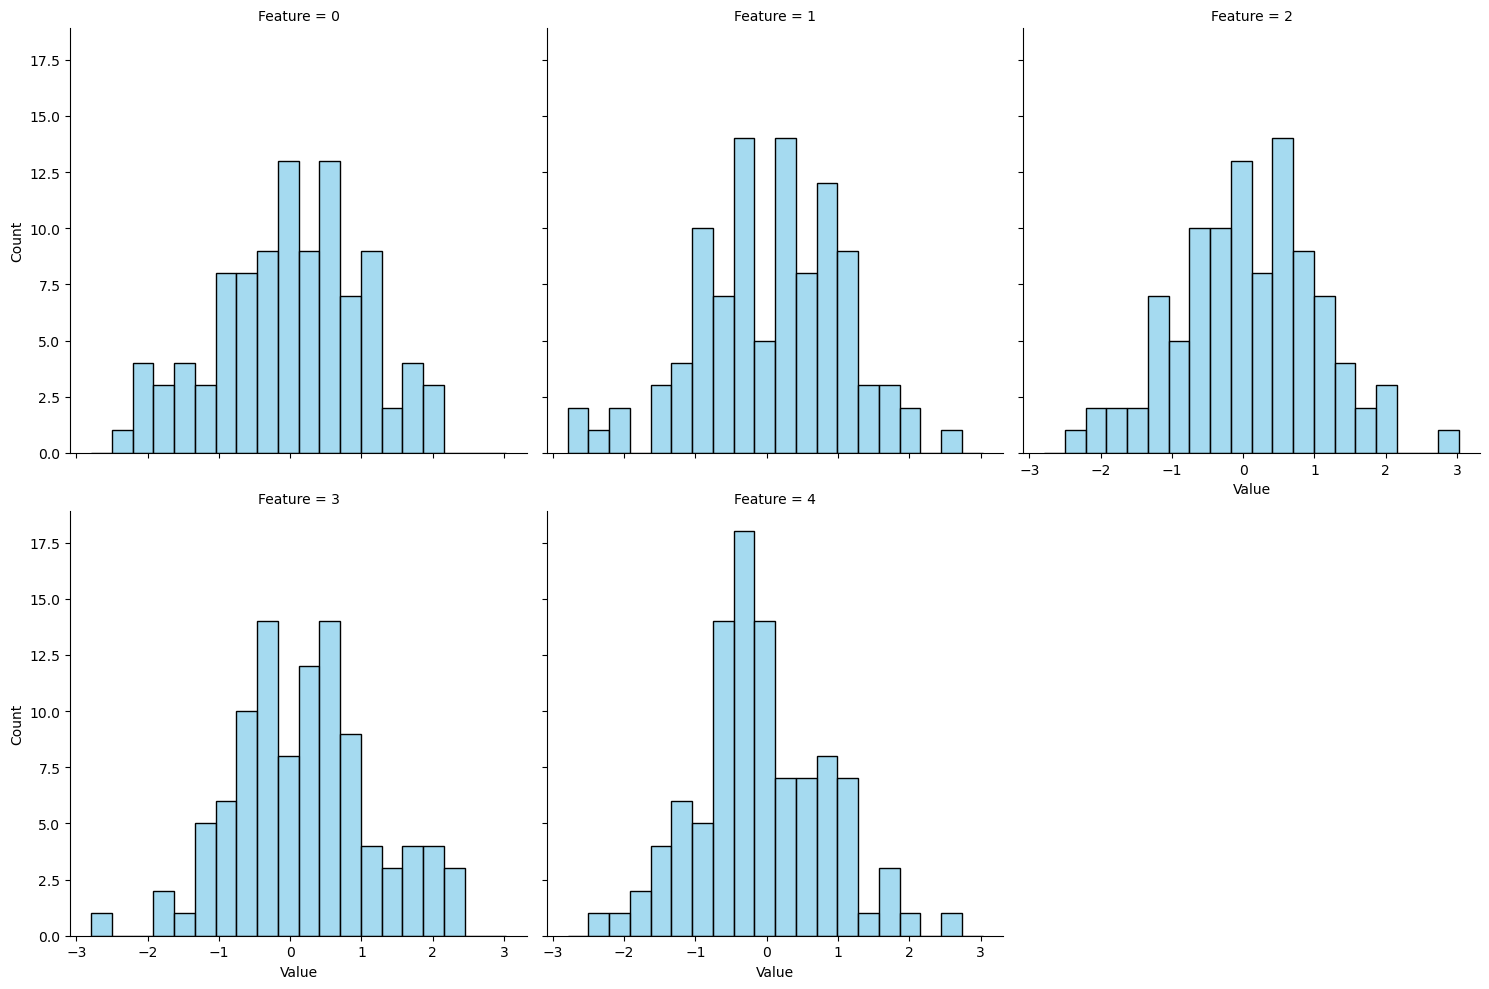

In [70]:
sns.displot(
    data=X_regression_df_melt,
    x="Value",
    col="Feature",
    col_wrap=3,
    kind="hist",
    rug=False,
    color="skyblue",
    bins=20,
)

In [71]:
X_regression_df_withy = X_regression_df.copy()
X_regression_df_withy["y"] = y_regression

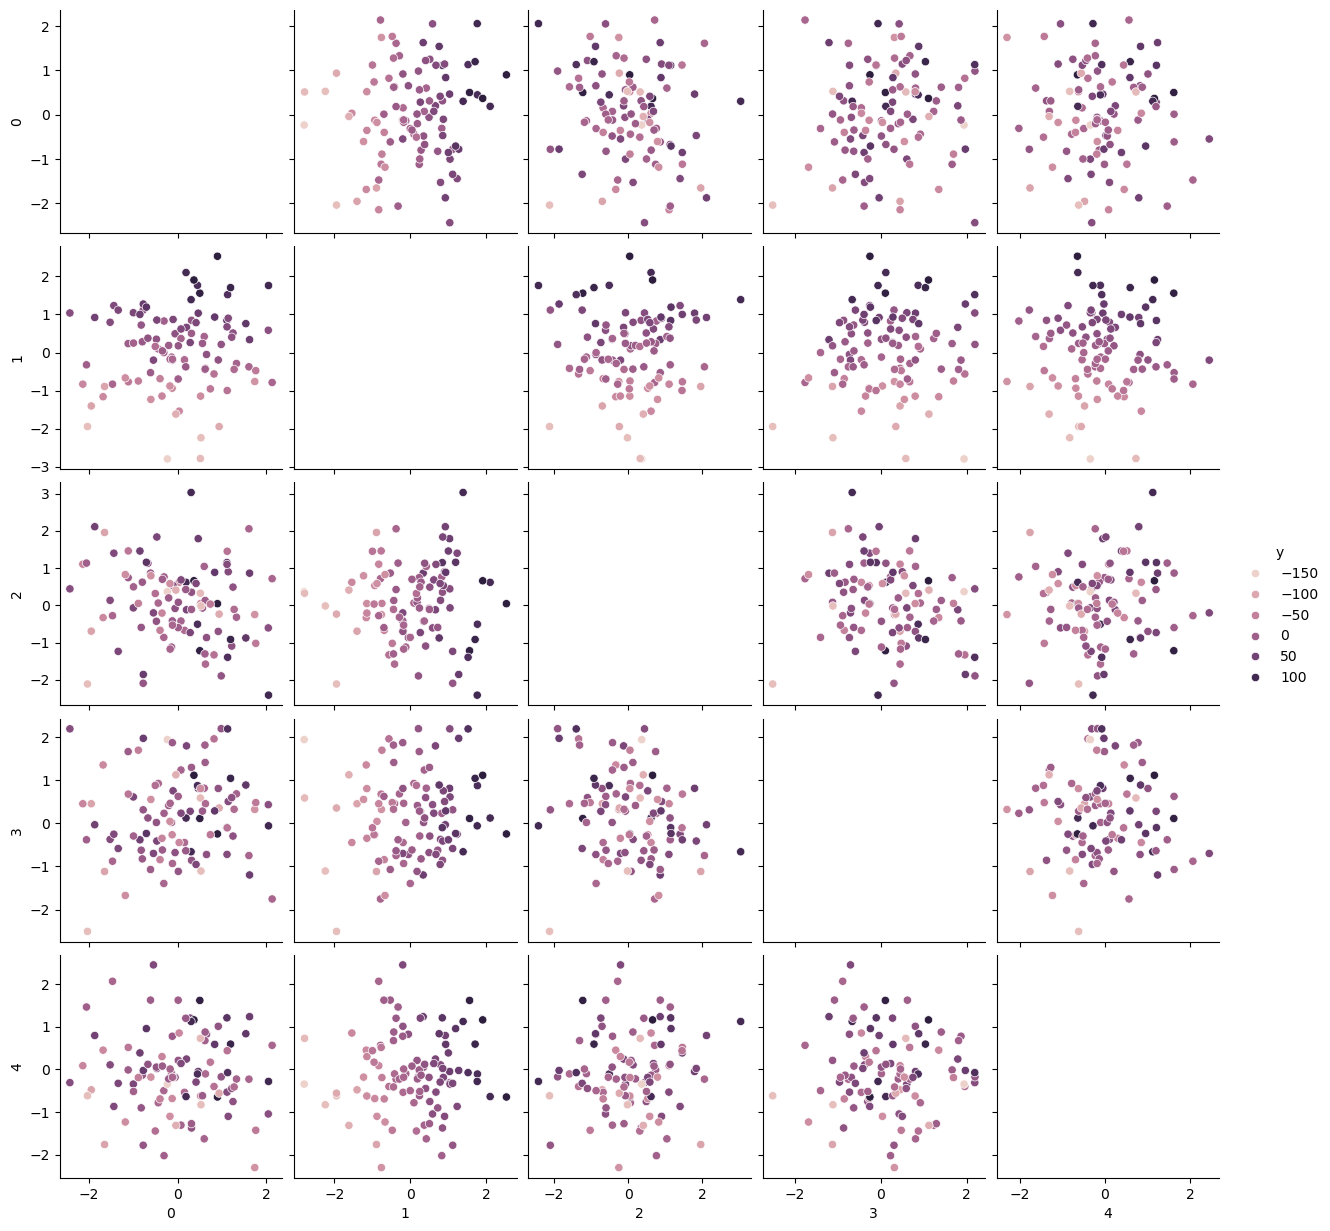

In [72]:
sns.pairplot(data=X_regression_df_withy, hue="y")

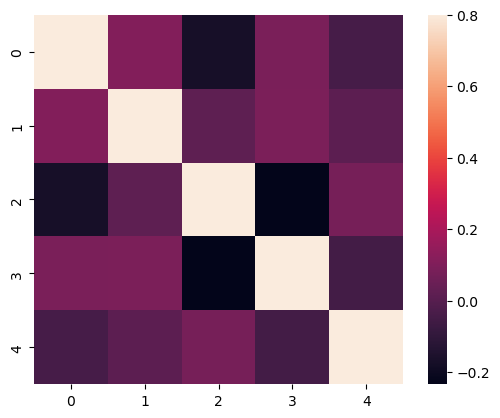

In [73]:
sns.heatmap(X_regression_df.corr(), vmax=0.8, square=True)

Notes:
- For the regression dataset, variance is similar in all features
- Which features are informative to fit a linear model are more difficult to assess than with the regression data
  - But by looking at the gradients it seems that at least features 1, 4, and maybe 0 (in this order of quality) will help us predict a value for y 
- Features don't correlate much with each other, which means no multicollinearity

# Single layer perceptrons

# Hard, multi-feature data

In [54]:
perceptron = single_layer.Perceptron(epochs=100, eta=0.1)

perceptron.fit(X=X_classification, y=y_classification)
print('Weights: %s' % perceptron.w_)

Weights: [-1.00000000e-01  3.24606957e-01 -1.36405556e-01 -6.65396526e-01
 -3.97377535e-01 -3.41069940e-04]


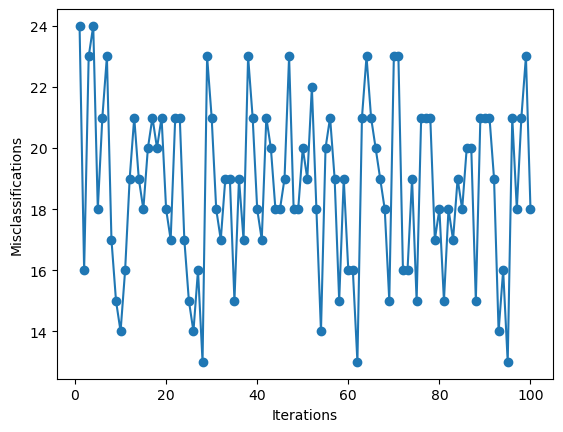

In [55]:
plt.plot(range(1, len(perceptron.errors_)+1), perceptron.errors_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Misclassifications')
plt.show()

## Check a 2-feature data set that is easier to separate samples 

In [ ]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header=None)

# setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)

# sepal length and petal length
X = df.iloc[0:100, [0,2]].values

<Axes: xlabel='0', ylabel='1'>

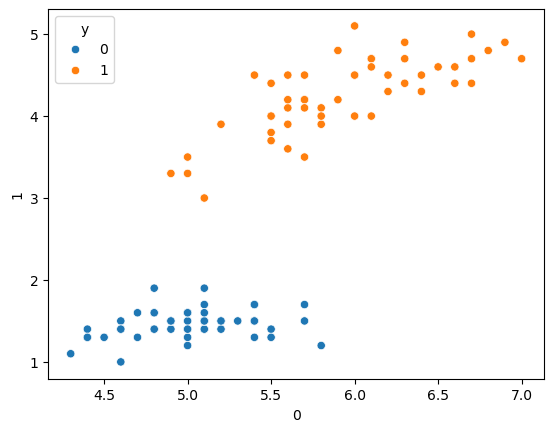

In [43]:
data = pd.DataFrame(X, columns=["0", "1"])
data["y"] = y

sns.scatterplot(data=data, x="0", y="1", hue="y")

Weights: [-0.4  -0.68  1.82]


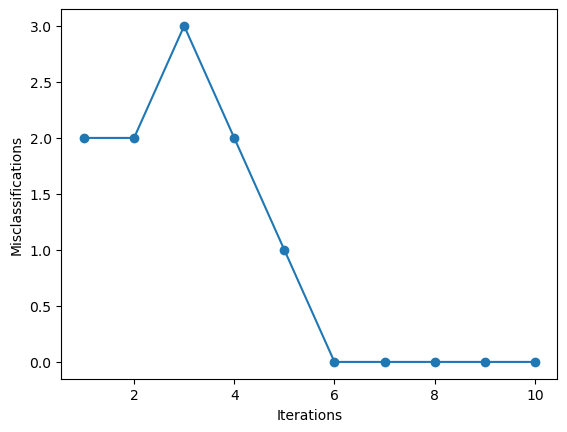

In [56]:
ppn = single_layer.Perceptron(epochs=10, eta=0.2)

ppn.fit(X, y)
print('Weights: %s' % ppn.w_)

plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Misclassifications')
plt.show()


- When it's easier to split samples, the perceptron simple update method works well. Otherwise, we need to find a better method